<a href="https://colab.research.google.com/github/Jamunajayanna/DataScience/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

# Check if path is a directory and if so, find the CSV file within it
if os.path.isdir(path):
    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            filepath = os.path.join(path, filename)
            df = pd.read_csv(filepath)
            break  # Stop after reading the first CSV file
    else:
        print("No CSV file found in the downloaded directory.")
else:
    # If path is not a directory, assume it's a file and try to read it
    df = pd.read_csv(path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/autompg-dataset/versions/3


In [ ]:
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
print(df.tail())

      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin         car name  
393          82       1  ford mustang gl  
394          82       2        vw pickup  
395          82       1    dodge rampage  
396          82       1      ford ranger  
397          82       1       chevy s-10  


In [ ]:
#dimenation of the dateset

print(df.shape)

(398, 9)


In [ ]:
#struture of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [ ]:
#summary of the dataset
print(df.describe())



              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [ ]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
for column in df.select_dtypes(include=np.number).columns:
  df[column].fillna(df[column].mean(),inplace=True)

<ipython-input-24-59e6d261ac1f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(),inplace=True)


In [ ]:
for column in df.select_dtypes(include='object').columns:
  df[column].fillna(df[column].mode(),inplace=True)

<ipython-input-28-4a4b66dee04c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode(),inplace=True)


In [ ]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
for column in df.select_dtypes(include=np.number).columns:
  df[column].fillna(df[column].mean())

In [ ]:
for column in df.select_dtypes(include='object').columns:
  df[column].fillna(df[column].mode())

In [ ]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


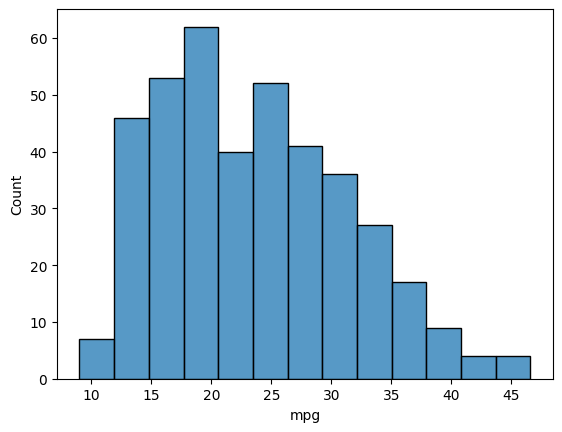

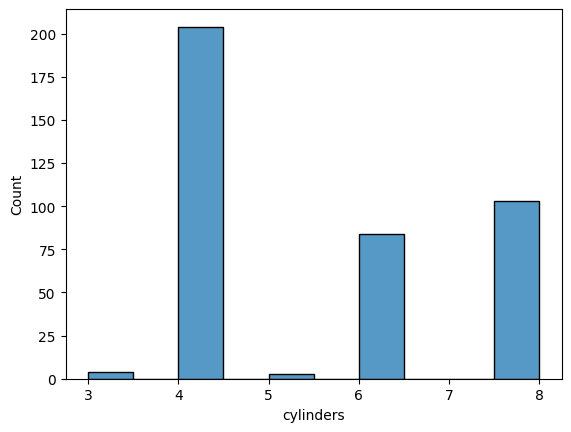

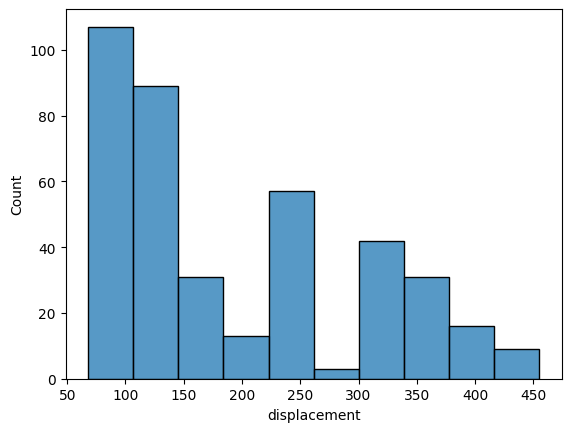

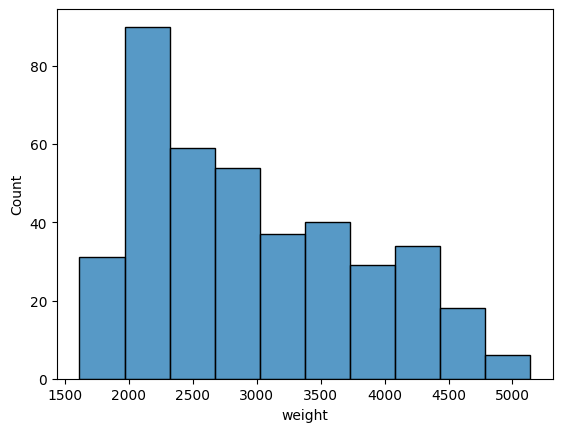

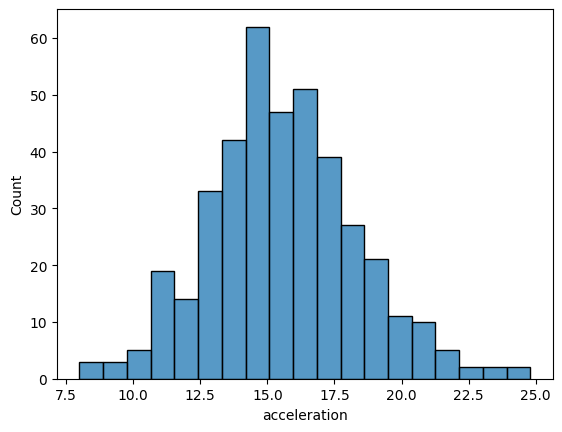

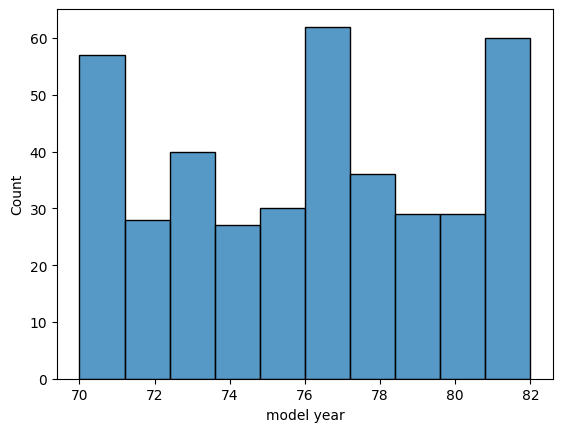

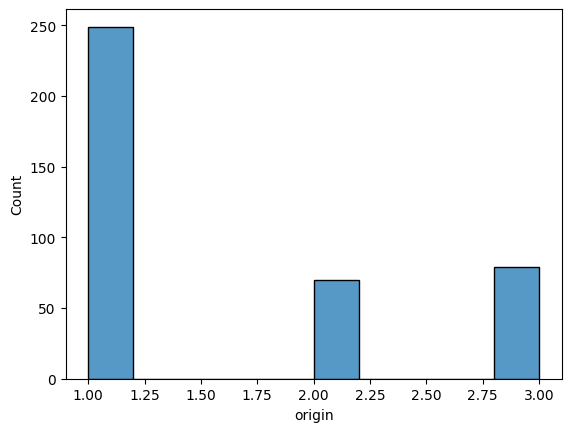

In [ ]:
contious_column=df.select_dtypes(include=np.number).columns
for column in contious_column:
  plt.figure()
  sns.histplot(df[column])
  plt.show()

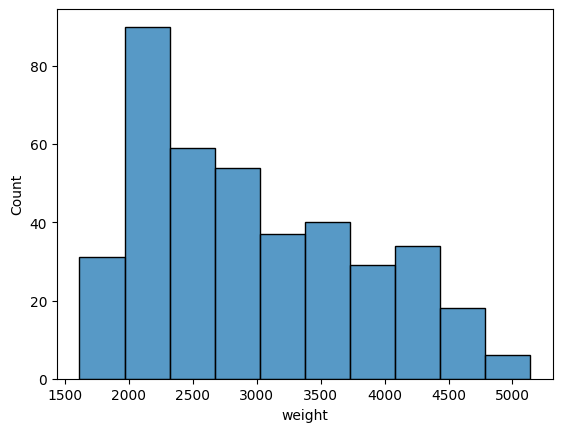

In [ ]:
sns.histplot(df['weight'])
plt.show()

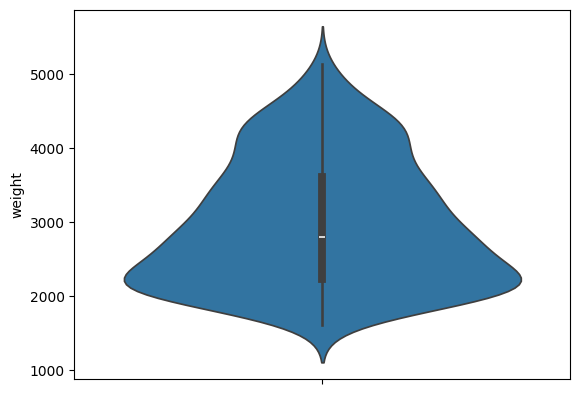

In [ ]:
sns.violinplot(y=df[continuous_columns[3]])
plt.show()

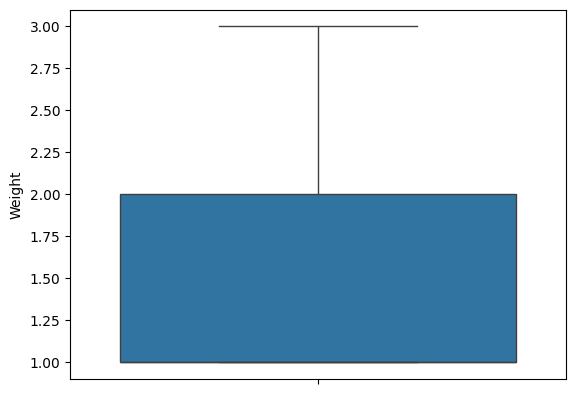

In [ ]:
sns.boxplot(y=df[weight])
plt.ylabel('Weight')
plt.show()

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


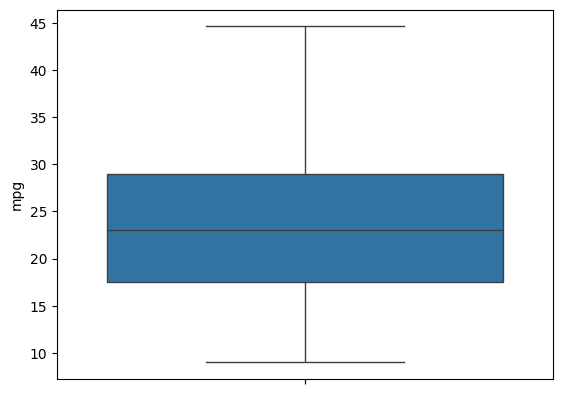

0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
393    4.0
394    4.0
395    4.0
396    4.0
397    4.0
Name: cylinders, Length: 398, dtype: float64


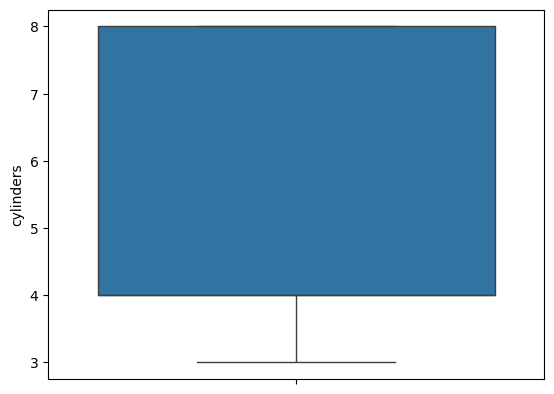

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64


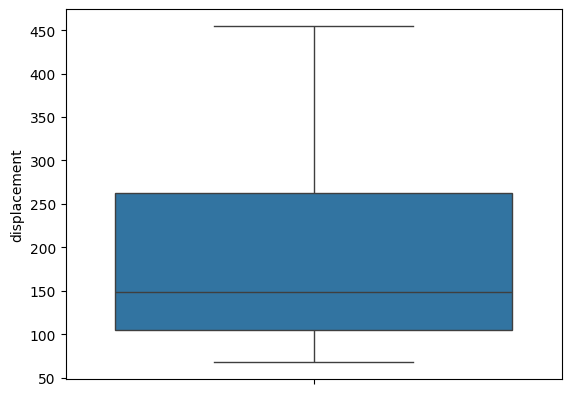

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 398, dtype: float64


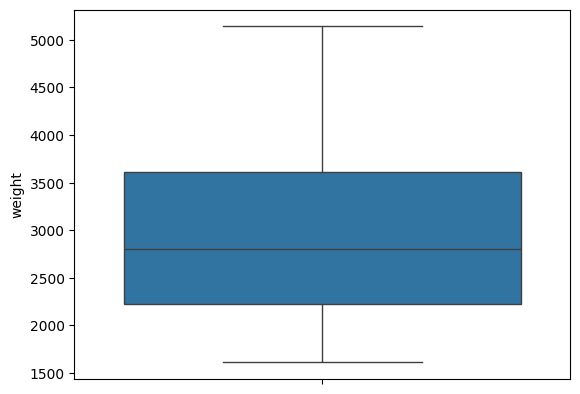

0      12.000000
1      11.500000
2      11.000000
3      12.000000
4      10.500000
         ...    
393    15.600000
394    15.622624
395    11.600000
396    18.600000
397    19.400000
Name: acceleration, Length: 398, dtype: float64


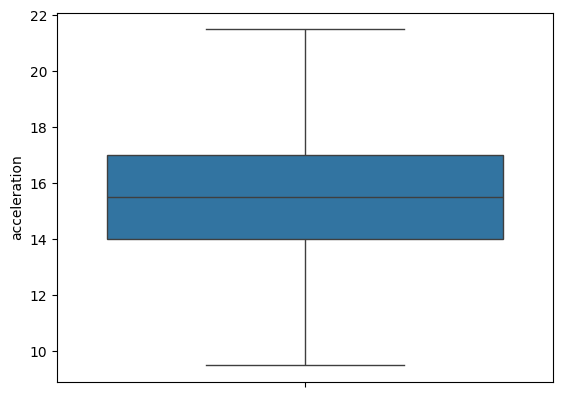

0      70.0
1      70.0
2      70.0
3      70.0
4      70.0
       ... 
393    82.0
394    82.0
395    82.0
396    82.0
397    82.0
Name: model year, Length: 398, dtype: float64


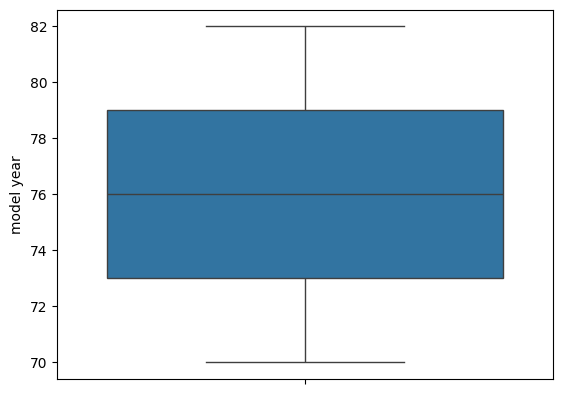

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
393    1.0
394    2.0
395    1.0
396    1.0
397    1.0
Name: origin, Length: 398, dtype: float64


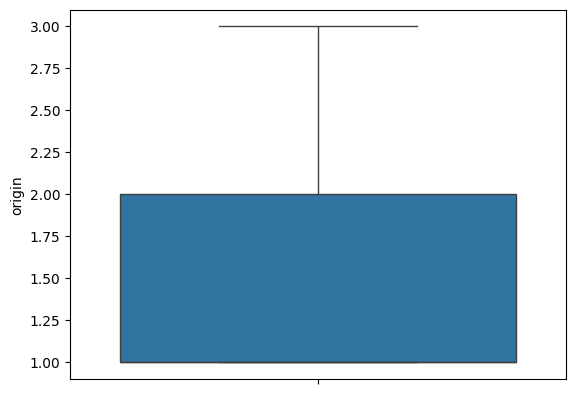

In [ ]:
for column in contious_column:
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[column]=np.where(df[column]<lower_bound,df[column].mean(),df[column])
  df[column]=np.where(df[column]>upper_bound,df[column].mean(),df[column])
  print(df[column])

  sns.boxplot(y=df[column])
  plt.show()

<ipython-input-64-42c8e249efa7>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert only convertible columns


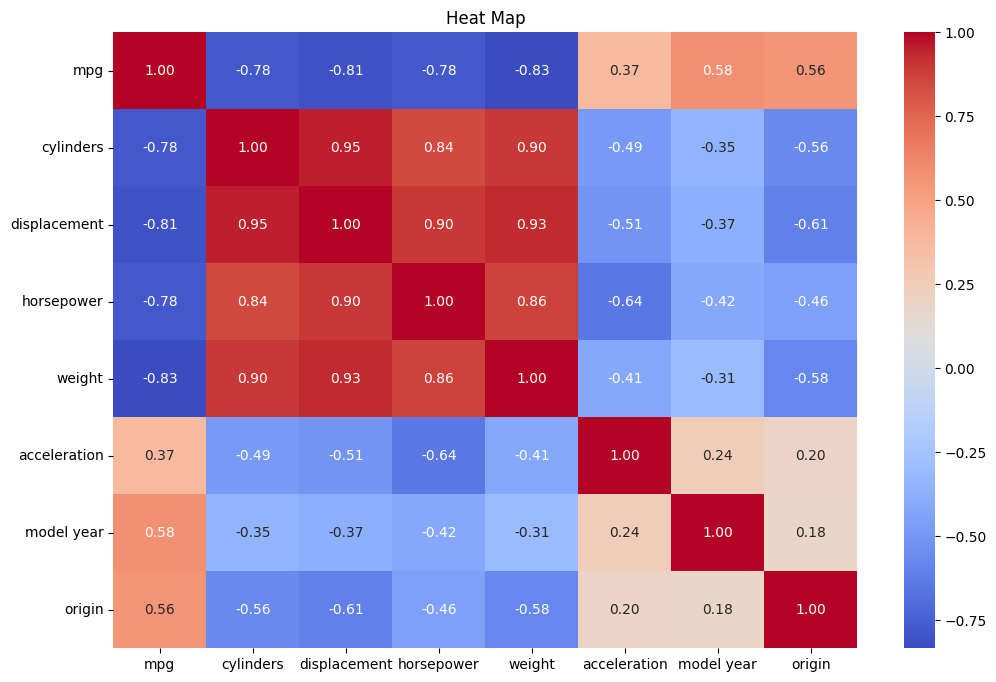

In [ ]:
# Replace '?' with NaN and convert numeric object columns to numeric type
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')  # Convert only convertible columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heat Map")
plt.show()


In [ ]:
scaler=StandardScaler()
df[continuous_columns]=scaler.fit_transform(df[continuous_columns])
print(df.head())

        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.706837   1.498191      1.090604       130.0  0.630870     -1.447018   
1 -1.095454   1.498191      1.503514       165.0  0.854333     -1.656342   
2 -0.706837   1.498191      1.196232       150.0  0.550470     -1.865666   
3 -0.965915   1.498191      1.061796       150.0  0.546923     -1.447018   
4 -0.836376   1.498191      1.042591       140.0  0.565841     -2.074990   

   model year    origin                   car name  
0   -1.627426 -0.715145  chevrolet chevelle malibu  
1   -1.627426 -0.715145          buick skylark 320  
2   -1.627426 -0.715145         plymouth satellite  
3   -1.627426 -0.715145              amc rebel sst  
4   -1.627426 -0.715145                ford torino  


In [1]:
print(df['horsepower'].unique())

NameError: name 'df' is not defined